# Divergence, curl module and other field vector field parameters

This document present some examples of vector field processing using pygsf methods.

## Preliminary settings

In order to plot fields, we run the following commands:

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

The modules to import for dealing with grids are:

In [31]:
from pygsf.mathematics.arrays import *

In [32]:
from pygsf.spatial.rasters.geotransform import *

In [33]:
from pygsf.spatial.rasters.mapping import *

## Fields and geotransform definitions

We calculate a theoretical, 2D vector field and check that the parameters calculated by *pygsf* is equal to the expected one.

We use a modified example from p. 67 in [1].

\begin{equation*}
 \vec{\mathbf{v}} = 0.001 x y^3  \vec{\mathbf{i}} - 0.002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}



In order to create the two grids that represent the x- and the y-components, we therefore define the following two "transfer" functions from coordinates to z values: 

In [34]:
def z_func_fx(x, y):

    return 0.001 * x * y**3

def z_func_fy(x, y):

    return - 0.002 * x**2 * y

The above functions define the value of the cells, using the given x and y geographic coordinates.

Arrays components are defined in terms of indices *i* and *j*, so to transform array indices to geographical coordinates we use a geotransform. The one chosen is:

In [35]:
gt1 = GeoTransform(
    inTopLeftX=15, 
    inTopLeftY=30, 
    inPixWidth=10, 
    inPixHeight=10)

Note that the chosen geotransform has no axis rotation, as is in the most part of cases with geographic grids.

Gridded field values are calculated for the theoretical source vector field x- and y- components using the provided number of rows and columns for the grid:

In [36]:
rows=50; cols=50

### vector field x-component

In [37]:
fx = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fx)

In [38]:
print(fx)

[[ 3.12500000e+02  4.68750000e+02  6.25000000e+02 ...  7.65625000e+03
   7.81250000e+03  7.96875000e+03]
 [ 6.75000000e+01  1.01250000e+02  1.35000000e+02 ...  1.65375000e+03
   1.68750000e+03  1.72125000e+03]
 [ 2.50000000e+00  3.75000000e+00  5.00000000e+00 ...  6.12500000e+01
   6.25000000e+01  6.37500000e+01]
 ...
 [-1.76242250e+06 -2.64363375e+06 -3.52484500e+06 ... -4.31793512e+07
  -4.40605625e+07 -4.49417738e+07]
 [-1.88392750e+06 -2.82589125e+06 -3.76785500e+06 ... -4.61562238e+07
  -4.70981875e+07 -4.80401512e+07]
 [-2.01089250e+06 -3.01633875e+06 -4.02178500e+06 ... -4.92668662e+07
  -5.02723125e+07 -5.12777588e+07]]


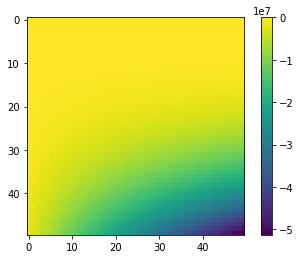

In [39]:
plt.imshow(fx); plt.colorbar()

### vector field y-component

In [40]:
fy = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fy)

In [41]:
print(fy)

[[-2.00000e+01 -4.50000e+01 -8.00000e+01 ... -1.20050e+04 -1.25000e+04
  -1.30050e+04]
 [-1.20000e+01 -2.70000e+01 -4.80000e+01 ... -7.20300e+03 -7.50000e+03
  -7.80300e+03]
 [-4.00000e+00 -9.00000e+00 -1.60000e+01 ... -2.40100e+03 -2.50000e+03
  -2.60100e+03]
 ...
 [ 3.56000e+02  8.01000e+02  1.42400e+03 ...  2.13689e+05  2.22500e+05
   2.31489e+05]
 [ 3.64000e+02  8.19000e+02  1.45600e+03 ...  2.18491e+05  2.27500e+05
   2.36691e+05]
 [ 3.72000e+02  8.37000e+02  1.48800e+03 ...  2.23293e+05  2.32500e+05
   2.41893e+05]]


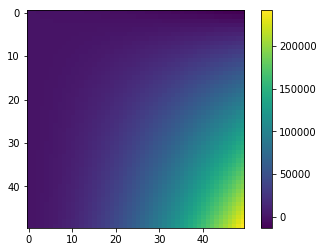

In [42]:
plt.imshow(fy); plt.colorbar()

## Testing divergence

The definition of divergence for our 2D case is:

\begin{align}
divergence = \nabla \cdot \vec{\mathbf{v}} & = \frac{\partial{v_x}}{\partial x} + \frac{\partial{v_y}}{\partial y}
\end{align}

### theoretical divergence

Since the vector field formula is:

\begin{equation*}
 \vec{\mathbf{v}} = 0.001 x y^3  \vec{\mathbf{i}} - 0.002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}

the theoretical divergence transfer function is:

In [43]:
def z_func_div(x, y):
    
    return 0.001 * y**3 - 0.002 * x**2

The theoretical divergence field can be created using the function expressing the analytical derivatives *z_func_div*:

In [44]:
f_div = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_div)

In [45]:
print(f_div)

[[ 1.48250000e+01  1.38250000e+01  1.24250000e+01 ... -4.64575000e+02
  -4.84375000e+02 -5.04575000e+02]
 [ 2.57500000e+00  1.57500000e+00  1.75000000e-01 ... -4.76825000e+02
  -4.96625000e+02 -5.16825000e+02]
 [-6.75000000e-01 -1.67500000e+00 -3.07500000e+00 ... -4.80075000e+02
  -4.99875000e+02 -5.20075000e+02]
 ...
 [-8.81219250e+04 -8.81229250e+04 -8.81243250e+04 ... -8.86013250e+04
  -8.86211250e+04 -8.86413250e+04]
 [-9.41971750e+04 -9.41981750e+04 -9.41995750e+04 ... -9.46765750e+04
  -9.46963750e+04 -9.47165750e+04]
 [-1.00545425e+05 -1.00546425e+05 -1.00547825e+05 ... -1.01024825e+05
  -1.01044625e+05 -1.01064825e+05]]


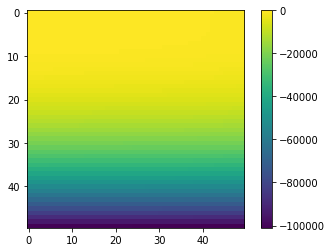

In [46]:
plt.imshow(f_div); plt.colorbar()

### pygsf-estimated divergence

Divergence as resulting from pygsf calculation:

In [47]:
div = divergence_2D(
    fld_x=fx, 
    fld_y=fy, 
    cell_size_x=10, 
    cell_size_y=10)

In [48]:
print(div)

[[ 1.48250000e+01  1.38250000e+01  1.24250000e+01 ... -4.64575000e+02
  -4.84375000e+02 -5.04575000e+02]
 [ 2.57500000e+00  1.57500000e+00  1.75000000e-01 ... -4.76825000e+02
  -4.96625000e+02 -5.16825000e+02]
 [-6.75000000e-01 -1.67500000e+00 -3.07500000e+00 ... -4.80075000e+02
  -4.99875000e+02 -5.20075000e+02]
 ...
 [-8.81219250e+04 -8.81229250e+04 -8.81243250e+04 ... -8.86013250e+04
  -8.86211250e+04 -8.86413250e+04]
 [-9.41971750e+04 -9.41981750e+04 -9.41995750e+04 ... -9.46765750e+04
  -9.46963750e+04 -9.47165750e+04]
 [-1.00545425e+05 -1.00546425e+05 -1.00547825e+05 ... -1.01024825e+05
  -1.01044625e+05 -1.01064825e+05]]


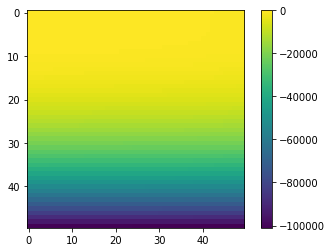

In [49]:
plt.imshow(div); plt.colorbar()

We check whether the theoretical and the estimated divergence fields are close:

In [50]:
np.allclose(f_div, div)

True

## Testing curl module

The definition of curl module in our 2D case is:

\begin{equation*}
\nabla \times \vec{\mathbf{v}} =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial }{\partial x} &  \frac{\partial }{\partial y} & \frac{\partial }{\partial z} \\
{v_x} &  {v_y} & 0
\end{vmatrix}
\end{equation*}

so that the module of the curl is:

\begin{equation*}
 |curl| = \frac{\partial v_y}{\partial x} - \frac{\partial v_x}{\partial y}
\end{equation*}

### theoretical curl module

The vector function is:

\begin{equation*}
 \vec{\mathbf{v}} = 0.001 x y^3  \vec{\mathbf{i}} - 0.002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}

there the theoretical curl module is:

\begin{equation*}
 |curl| = abs(0.004 x y + 0.003 x y^2)
\end{equation*}

so that the theoretical transfer function is:

In [51]:
def z_func_curl_mod(x, y):
    
    return abs(0.004 * x * y + 0.003 * x * y**2)

The theoretical divergence field can be created using the function expressing the analytical derivatives *z_func_div*:

In [52]:
f_curl_mod = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_curl_mod)

In [53]:
print(f_curl_mod)

[[3.9500000e+01 5.9250000e+01 7.9000000e+01 ... 9.6775000e+02
  9.8750000e+02 1.0072500e+03]
 [1.4700000e+01 2.2050000e+01 2.9400000e+01 ... 3.6015000e+02
  3.6750000e+02 3.7485000e+02]
 [1.9000000e+00 2.8500000e+00 3.8000000e+00 ... 4.6550000e+01
  4.7500000e+01 4.8450000e+01]
 ...
 [1.1845900e+04 1.7768850e+04 2.3691800e+04 ... 2.9022455e+05
  2.9614750e+05 3.0207045e+05]
 [1.2385100e+04 1.8577650e+04 2.4770200e+04 ... 3.0343495e+05
  3.0962750e+05 3.1582005e+05]
 [1.2936300e+04 1.9404450e+04 2.5872600e+04 ... 3.1693935e+05
  3.2340750e+05 3.2987565e+05]]


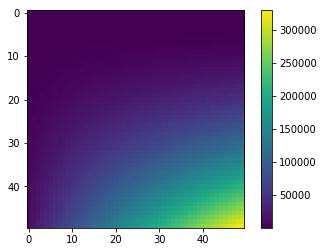

In [54]:
plt.imshow(f_curl_mod); plt.colorbar()

### pygsf-estimated module of curl

The module of curl as resulting from pygsf calculation is:

In [55]:
curl_module = curl_mod(
    fld_x=fx, 
    fld_y=fy, 
    cell_size_x=10, 
    cell_size_y=10)

In [56]:
print(curl_module)

[[3.1500000e+01 4.7250000e+01 6.3000000e+01 ... 7.7175000e+02
  7.8750000e+02 8.0325000e+02]
 [1.4300000e+01 2.1450000e+01 2.8600000e+01 ... 3.5035000e+02
  3.5750000e+02 3.6465000e+02]
 [3.1000000e+00 4.6500000e+00 6.2000000e+00 ... 7.5950000e+01
  7.7500000e+01 7.9050000e+01]
 ...
 [1.1919100e+04 1.7878650e+04 2.3838200e+04 ... 2.9201795e+05
  2.9797750e+05 3.0393705e+05]
 [1.2459900e+04 1.8689850e+04 2.4919800e+04 ... 3.0526755e+05
  3.1149750e+05 3.1772745e+05]
 [1.3006700e+04 1.9510050e+04 2.6013400e+04 ... 3.1866415e+05
  3.2516750e+05 3.3167085e+05]]


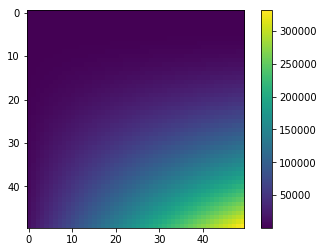

In [57]:
plt.imshow(curl_module); plt.colorbar()

We check whether the theoretical and the estimated curl module fields are close:

In [59]:
np.allclose(f_curl_mod, curl_module)

False

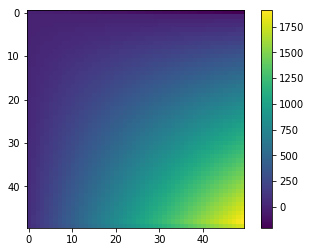

In [60]:
diffs = curl_module - f_curl_mod
plt.imshow(diffs); plt.colorbar()

### References

[1] M. R. Spiegel, 1975. Analisi Vettoriale. Etas Libri, pp. 224.